# 1. Preprocess and clean

In [24]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

def process_file(file_path, labels):
    df = pd.read_csv(file_path)
    majority_class = df[df['Label'] == "BENIGN"]
    minority_classes = [df[df['Label'] == label] for label in labels]
    smallest_minority_class_len = min(len(minority_class) for minority_class in minority_classes)
    majority_class = majority_class[:smallest_minority_class_len]
    return majority_class, minority_classes

majority_class, minority_classes = process_file('./content/Thursday-15-02-2018.csv', ["DoS Slowloris", "DoS GoldenEye"])
majority_class, minority_classes2 = process_file('./content/Friday-16-02-2018.csv', ["DoS Hulk"])
majority_class = pd.concat([majority_class, majority_class[:len(minority_classes2[0])]])

majority_class, minority_classes3 = process_file('./content/Tuesday-20-02-2018.csv', ["DDoS-LOIC-HTTP", "DDoS-LOIC-UDP"])
majority_class = pd.concat([majority_class, majority_class[:len(minority_classes3[0] + minority_classes3[1])]])

majority_class, minority_classes4 = process_file('./content/Wednesday-21-02-2018.csv', ["DDoS-LOIC-UDP", "DDoS-HOIC"])
majority_class = pd.concat([majority_class, majority_class[:len(minority_classes4[1])]])

minority_classes += minority_classes2 + minority_classes3 + minority_classes4

minority_lengths = [len(minority_class) for minority_class in minority_classes]

print("_______________________________________________________________________________________________")
print("BENIGN:         " + str(len(majority_class)))
for i, length in enumerate(minority_lengths):
    print(f"Minority class {i+1}: " + str(length))
print("_______________________________________________________________________________________________")

# undersampling the majority class
n_samples = min(len(majority_class), sum(minority_lengths))
undersampled_majority = resample(majority_class, replace=False, n_samples=n_samples, random_state=57)

# merging undersampled majority class with original minority class
to_csv = pd.concat([undersampled_majority] + minority_classes)

to_csv.replace([np.inf, -np.inf], np.nan, inplace=True)
to_csv.dropna(inplace=True)

print("FINAL LENGTH:" + str(len(to_csv)))
file_path = './content/DoS_attacks_balanced.csv'
to_csv.to_csv(file_path, index=False)

_______________________________________________________________________________________________
BENIGN:         3460
Minority class 1: 8490
Minority class 2: 22560
Minority class 3: 1803160
Minority class 4: 289328
Minority class 5: 797
Minority class 6: 1730
Minority class 7: 1082293
_______________________________________________________________________________________________
FINAL LENGTH:3211818


In [25]:
import pandas as pd
import numpy as np

def process_file(file_path, labels):
    df = pd.read_csv(file_path)
    majority_class = df[df['Label'] == "BENIGN"]
    minority_classes = [df[df['Label'] == label] for label in labels]
    smallest_minority_class_len = min(len(minority_class) for minority_class in minority_classes)
    majority_class = majority_class[:smallest_minority_class_len]
    return majority_class, minority_classes

majority_class, minority_classes = process_file('./content/Wednesday-14-02-2018.csv', ["SSH-BruteForce"])
majority_class2, minority_classes2 = process_file('./content/Thursday-22-02-2018.csv', ["Web Attack - SQL", "Web Attack - XSS", "Web Attack - Brute Force"])
majority_class = pd.concat([majority_class, majority_class2[:len(minority_classes2[0] + minority_classes2[1] + minority_classes2[2])]])

_, minority_classes3 = process_file('./content/Friday-23-02-2018.csv', ["Web Attack - SQL", "Web Attack - XSS", "Web Attack - Brute Force"])
minority_classes2 = [pd.concat([minority_classes2[i], minority_classes3[i]]) for i in range(3)]

print("_______________________________________________________________________________________________")
print("BENIGN:         " + str(len(majority_class)))
for i, minority_class in enumerate(minority_classes + minority_classes2):
    print(f"Minority class {i+1}: " + str(len(minority_class)))
print("_______________________________________________________________________________________________")

# merging undersampled majority class with original minority class
to_csv = pd.concat([majority_class] + minority_classes + minority_classes2)

to_csv.replace([np.inf, -np.inf], np.nan, inplace=True)
to_csv.dropna(inplace=True)

print("FINAL LENGTH:" + str(len(to_csv)))
file_path = './content/BruteForce_attacks_balanced.csv'
to_csv.to_csv(file_path, index=False)

_______________________________________________________________________________________________
BENIGN:         94213
Minority class 1: 94197
Minority class 2: 39
Minority class 3: 113
Minority class 4: 131
_______________________________________________________________________________________________
FINAL LENGTH:188693


In [52]:
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv('./content/Wednesday-28-02-2018.csv')
majority_class = df[df['Label'] == "BENIGN"].copy()
minority_class = df[df['Label'] == "Infiltration - NMAP Portscan"].copy()

print(f"BENIGN: {len(majority_class)}")
print(f"Infiltration - NMAP Portscan: {len(minority_class)}")
undersampled_majority = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=57)

undersampled_df = pd.concat([undersampled_majority, minority_class])
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)


undersampled_df.replace([np.inf, -np.inf], np.nan, inplace=True)
undersampled_df.dropna(inplace=True)

print(f"FINAL LENGTH: {len(undersampled_df)}")

undersampled_df.to_csv('./content/portscan_attacks_balanced.csv', index=False)

BENIGN: 6518882
Infiltration - NMAP Portscan: 49740
FINAL LENGTH: 99480


In [26]:
import pandas as pd
from sklearn.utils import resample
import numpy as np

df = pd.read_csv('./content/Friday-02-03-2018.csv')
majority_class = df[df['Label'] == "BENIGN"]
minority_class = df[df['Label'] == "Botnet Ares"]

print("BENIGN: " + str(len(majority_class)))
print("Botnet Attacks: " + str(len(minority_class)))

#undersampling the majority class
undersampled_majority = resample(majority_class,
                                 replace=False, n_samples=len(minority_class), random_state=57)

# merging undersampled majority class with original minority class
undersampled_df = pd.concat([undersampled_majority, minority_class])

# shuffling df to randomize the sample order
undersampled_df = undersampled_df.sample(frac=1, random_state=57).reset_index(drop=True)

print("FINAL LENGTH:" + str(len(undersampled_df)))

undersampled_df = undersampled_df.replace([np.inf, -np.inf], np.nan).dropna()

file_path = './content/botnet_attacks_balanced.csv'
undersampled_df.to_csv(file_path, index=False)

BENIGN: 6168188
Botnet Attacks: 142921
FINAL LENGTH:285842


# 2.1. Analysis of Dos Attack data

In [5]:
import pandas as pd

df_DoS_attacks = pd.read_csv('./content/DoS_attacks_balanced.csv')

#types of DoS attacks present
unique_labels = df_DoS_attacks['Label'].unique()
print("Unique DoS attack labels in the dataset:", unique_labels)

Unique DoS attack labels in the dataset: ['BENIGN' 'DoS Slowloris' 'DoS GoldenEye' 'DoS Hulk' 'DDoS-LOIC-HTTP'
 'DDoS-LOIC-UDP' 'DDoS-HOIC']


In [29]:
import pandas as pd
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler

df_DoS_attacks = df_DoS_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

# do no uncomment, this will merge all dos labels into one, making the expanded confusion matrix useless
"""
label_replacements = {"DoS Slowloris": "DoS Attack", "DoS Hulk": "DoS Attack", "DDoS-HOIC": "DoS Attack",
                      "DDoS-LOIC-HTTP": "DoS Attack", "DDoS-LOIC-UDP": "DoS Attack", "DoS GoldenEye": "DoS Attack"}
df_DoS_attacks['Label'] = df_DoS_attacks['Label'].replace(label_replacements)
"""
# normalizing the data
X = df_DoS_attacks.drop("Label", axis=1)
y = df_DoS_attacks["Label"]

features = X.columns

In [30]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# rfc params
max_depth = 16
n_estimators = 20

# dataset split into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=57)
rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, verbose=2)

print("Starting training...")
rf_classifier.fit(X_train, y_train)
print("Training completed.")

Starting training...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training completed.


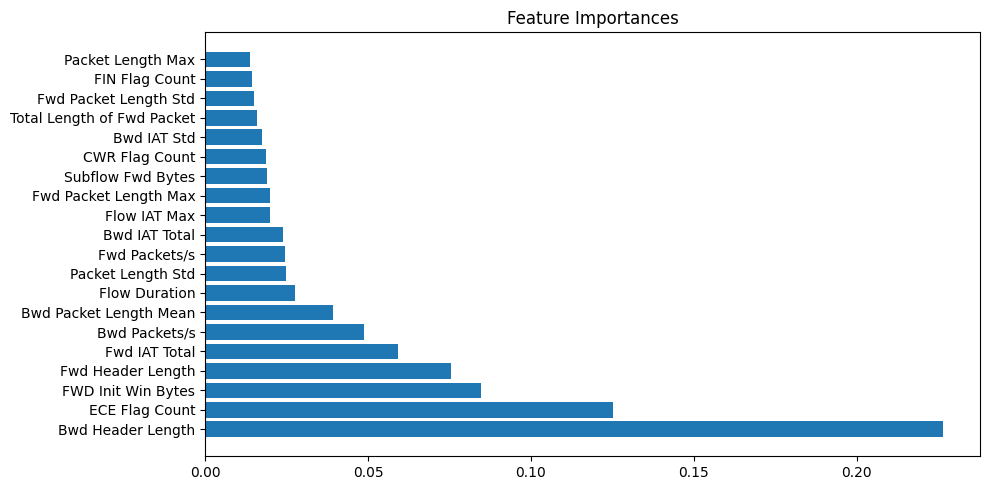

In [34]:
import matplotlib.pyplot as plt
import numpy as np

# sorting feature importance
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]
sorted_feature_names = [features[i] for i in indices]

# max num of feats to plot (or consider)
num_features = 20

# planning and plotting (heinous cooking)
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(num_features), importances[indices[:num_features]])
plt.yticks(range(num_features), sorted_feature_names[:num_features])
plt.tight_layout()
plt.show()

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# making predictions
y_pred = rf_classifier.predict(X_test)

print(f'Accuracy: {accuracy_score(y_test, y_pred):.5f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 1.00000
Classification Report:
                 precision    recall  f1-score   support

        BENIGN       1.00      1.00      1.00       705
     DDoS-HOIC       1.00      1.00      1.00    216440
DDoS-LOIC-HTTP       1.00      1.00      1.00     57955
 DDoS-LOIC-UDP       1.00      1.00      1.00       506
 DoS GoldenEye       1.00      1.00      1.00      4401
      DoS Hulk       1.00      1.00      1.00    360646
 DoS Slowloris       1.00      1.00      1.00      1711

      accuracy                           1.00    642364
     macro avg       1.00      1.00      1.00    642364
  weighted avg       1.00      1.00      1.00    642364

Confusion Matrix:
 [[   705      0      0      0      0      0      0]
 [     0 216440      0      0      0      0      0]
 [     0      0  57955      0      0      0      0]
 [     0      0      0    506      0      0      0]
 [     0      0      0      0   4401      0      0]
 [     0      0      0      0      0 360646      0]
 [     0

# 2.2 Analysis of Bruteforce data

In [2]:
import pandas as pd

csv_files = ['./content/BruteForce_attacks_balanced.csv', './content/FTPBruteForce_attacks_balanced.csv']
df_BruteForce_attacks = pd.concat([pd.read_csv(f) for f in csv_files])

#types of bruteforce data available
print("Unique labels in the dataset:", df_BruteForce_attacks['Label'].unique())

Unique labels in the dataset: ['BENIGN' 'SSH-BruteForce' 'Web Attack - SQL' 'Web Attack - XSS'
 'Web Attack - Brute Force' 'FTP-BruteForce']


In [38]:
import pandas as pd

#dropping useless columns
df_BruteForce_attacks = df_BruteForce_attacks.drop(['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"], axis=1)

print(df_BruteForce_attacks['Label'].value_counts())

#replaced ssh, ftp and vanilla bf labels with 'BruteForce Attack'
label_replacements = {"SSH-BruteForce": "BruteForce Attack", "FTP-BruteForce": "BruteForce Attack"}
df_BruteForce_attacks['Label'] = df_BruteForce_attacks['Label'].replace(label_replacements)

#dataset X and the target labels y
X = df_BruteForce_attacks.drop("Label", axis=1)
y = df_BruteForce_attacks["Label"]

Label
BENIGN                      99007
SSH-BruteForce              94197
FTP-BruteForce               4950
Web Attack - Brute Force      131
Web Attack - XSS              113
Web Attack - SQL               39
Name: count, dtype: int64


In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=57)
rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20, verbose=2)

print("Training the RandomForestClassifier...")
rf_classifier.fit(X_train, y_train)
print("Training completed.")

Training the RandomForestClassifier...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training completed.


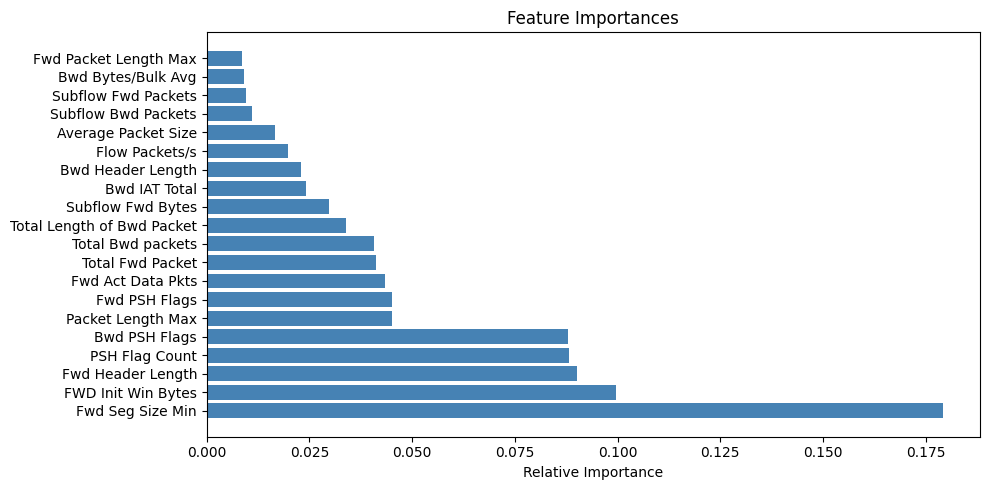

In [40]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_classifier.feature_importances_
feature_names = features
indices = np.argsort(importances, kind='stable')[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]], color='steelblue', align='center')
plt.yticks(range(20), sorted_feature_names[:20])
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()

In [41]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

usecols_features_importance = [ "FWD Init Win Bytes", "Bwd PSH Flags", "Fwd Act Data Pkts", "Fwd PSH Flags", "Fwd Header Length", "Total Bwd packets",
                               "Fwd Seg Size Min", "Bwd Init Win Bytes", "Label"]

df_BruteForce_attacks = pd.concat([pd.read_csv(f, usecols=usecols_features_importance) for f in ['./content/BruteForce_attacks_balanced.csv', './content/FTPBruteForce_attacks_balanced.csv']])

#replacing ssh ftp and vanilla bf labels with 'BruteForce Attack'
label_replacements = {"SSH-BruteForce": "BruteForce Attack", "FTP-BruteForce": "BruteForce Attack"}
df_BruteForce_attacks['Label'] = df_BruteForce_attacks['Label'].replace(label_replacements)

#dataset X and the target labels y
features = df_BruteForce_attacks.columns.drop(["Label"])
X = df_BruteForce_attacks[features]
y = df_BruteForce_attacks["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=57)
rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)

#training
rf_classifier.fit(X_train, y_train)

#making predictions
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=True)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
                          precision    recall  f1-score   support

                  BENIGN       1.00      1.00      1.00     19762
       BruteForce Attack       1.00      1.00      1.00     19864
Web Attack - Brute Force       1.00      1.00      1.00        26
        Web Attack - SQL       1.00      0.92      0.96        13
        Web Attack - XSS       1.00      1.00      1.00        23

                accuracy                           1.00     39688
               macro avg       1.00      0.98      0.99     39688
            weighted avg       1.00      1.00      1.00     39688

[[19762     0     0     0     0]
 [    0 19864     0     0     0]
 [    0     0    26     0     0]
 [    1     0     0    12     0]
 [    0     0     0     0    23]]


# 2.3 Analysis of Portscan data

In [3]:
import pandas as pd

#opening the csv with only columns that are important for the model
df_PortScan_attacks = pd.read_csv('./content/portscan_attacks_balanced.csv', usecols=lambda column : column not in ['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"])

# types of portscan attacks
print('Unique Labels in the Dataset:')
print(df_PortScan_attacks['Label'].unique())

Unique Labels in the Dataset:
['Infiltration - NMAP Portscan' 'BENIGN']


In [43]:
#number of flows for each flow type
benign_flows_count = df_PortScan_attacks[df_PortScan_attacks['Label'] == 'BENIGN'].count().iloc[0]
portscan_attacks_count = df_PortScan_attacks[df_PortScan_attacks['Label'] == 'Infiltration - NMAP Portscan'].count().iloc[0]

print(f"BENIGN Flows: {benign_flows_count}")
print(f"PortScan Attacks: {portscan_attacks_count}")
features = df_PortScan_attacks.columns.drop(["Label"])
X = df_PortScan_attacks[features]
y = df_PortScan_attacks["Label"]

BENIGN Flows: 49740
PortScan Attacks: 49740


#### Finding important features required to classify portscan attacks

In [44]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_size = 0.20
random_state = 57

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

max_depth = 16
n_estimators = 20
rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, verbose=2)

print("Training...")
rf_classifier.fit(X_train, y_train)
print("Training completed.")

Training...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training completed.


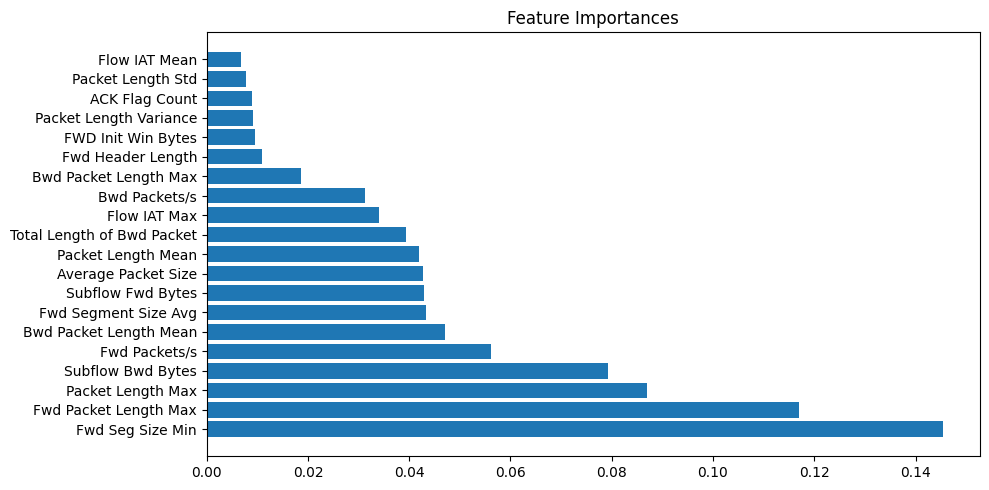

In [45]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_classifier.feature_importances_
feature_names = features
indices = np.argsort(importances, axis=0)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]], align='center')
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

#### Training the model for portscan based on imp features

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

usecols_features_importance = ["Subflow Bwd Bytes", "Average Packet Size", "Bwd Packet Length Mean", "FIN Flag Count",
                         "Flow IAT Mean", "Flow Packets/s", "Flow Bytes/s", "Bwd IAT Total", "Label"]

df_PortScan_attacks = pd.read_csv('./content/portscan_attacks_balanced.csv', usecols=usecols_features_importance)
features = df_PortScan_attacks.columns.drop(["Label"])

X = df_PortScan_attacks[features]
y = df_PortScan_attacks["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=57)
rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=True)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
                              precision    recall  f1-score   support

                      BENIGN       1.00      0.99      1.00      9902
Infiltration - NMAP Portscan       0.99      1.00      1.00      9994

                    accuracy                           1.00     19896
                   macro avg       1.00      1.00      1.00     19896
                weighted avg       1.00      1.00      1.00     19896

[[9840   62]
 [   4 9990]]


# 2.4 Analysis of Botnet data

In [4]:
import pandas as pd

df_BotNet_attacks = pd.read_csv('./content/botnet_attacks_balanced.csv', usecols=lambda column : column not in ['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                                                    'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"])

print('Unique Labels in the Dataset:')
print(df_BotNet_attacks['Label'].unique())

Unique Labels in the Dataset:
['BENIGN' 'Botnet Ares']


In [48]:
from sklearn.preprocessing import MinMaxScaler

features = df_BotNet_attacks.columns.drop(["Label"])
benign_flows_count = df_BotNet_attacks[df_BotNet_attacks['Label'] == 'BENIGN'].count().iloc[0]
botnet_attacks_count = df_BotNet_attacks[df_BotNet_attacks['Label'] == 'Botnet Ares'].count().iloc[0]

print(f"BENIGN Flows: {benign_flows_count}")
print(f"Botnet Attacks: {botnet_attacks_count}")

X = df_BotNet_attacks[features]
y = df_BotNet_attacks["Label"]

BENIGN Flows: 142921
Botnet Attacks: 142921


#### Finding important features required to classify botnet attacks

In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

test_size = 0.20
random_state = 57
max_depth = 16
n_estimators = 20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

rf_classifier = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators, verbose=2)

print("Training...")
rf_classifier.fit(X_train, y_train)
print("Training completed.")

Training...
building tree 1 of 20
building tree 2 of 20
building tree 3 of 20
building tree 4 of 20
building tree 5 of 20
building tree 6 of 20
building tree 7 of 20
building tree 8 of 20
building tree 9 of 20
building tree 10 of 20
building tree 11 of 20
building tree 12 of 20
building tree 13 of 20
building tree 14 of 20
building tree 15 of 20
building tree 16 of 20
building tree 17 of 20
building tree 18 of 20
building tree 19 of 20
building tree 20 of 20
Training completed.


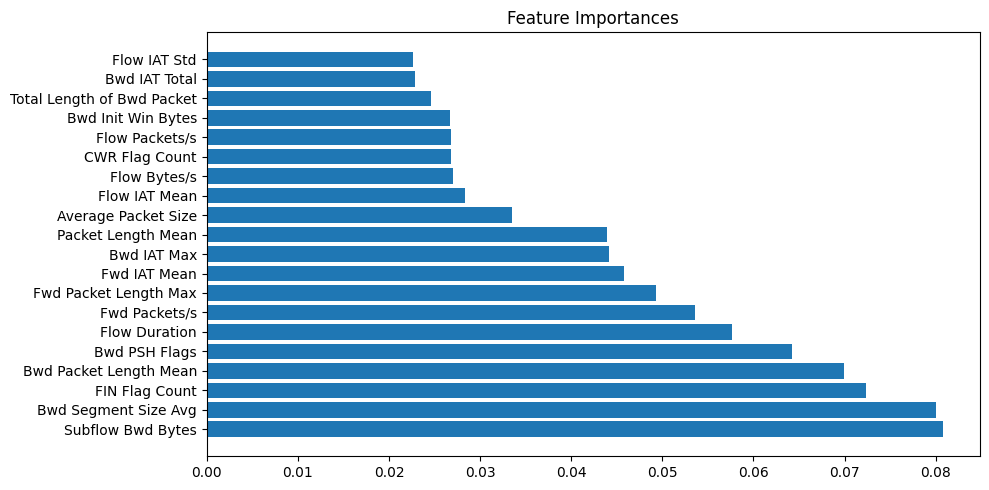

In [50]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf_classifier.feature_importances_
feature_names = features
indices = np.argsort(importances, axis=0)[::-1]
sorted_feature_names = [feature_names[i] for i in indices]

plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.barh(range(20), importances[indices[:20]], align='center')
plt.yticks(range(20), sorted_feature_names[:20])
plt.tight_layout()
plt.show()

In [51]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

usecols_features_importance = ["Bwd Packet Length Mean", "Subflow Bwd Bytes", "FIN Flag Count", "Bwd Packets/s", "Fwd Packets/s", "Flow Bytes/s",
                                "Flow IAT Max", "Packet Length Mean", "Label"]

df_BotNet_attacks = pd.read_csv('./content/botnet_attacks_balanced.csv', usecols=usecols_features_importance)
features = df_BotNet_attacks.columns.drop(["Label"])

X = df_BotNet_attacks[features]
y = df_BotNet_attacks["Label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=57)

rf_classifier = RandomForestClassifier(max_depth=16, n_estimators=20)
rf_classifier.fit(X_train, y_train)

y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred, normalize=True)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

      BENIGN       1.00      1.00      1.00     28683
 Botnet Ares       1.00      1.00      1.00     28486

    accuracy                           1.00     57169
   macro avg       1.00      1.00      1.00     57169
weighted avg       1.00      1.00      1.00     57169

[[28683     0]
 [    0 28486]]


# 3. Merging everything into a single model

In [14]:
import pandas as pd

file_paths = ['./content/DoS_attacks_balanced.csv', './content/BruteForce_attacks_balanced.csv', 
              './content/FTPBruteForce_attacks_balanced.csv', './content/botnet_attacks_balanced.csv', 
              './content/portscan_attacks_balanced.csv']

drop_columns = [['Attempted Category', 'id', 'Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol',
                 'Timestamp', "Fwd RST Flags", "Bwd RST Flags", "ICMP Code", "ICMP Type" , "Total TCP Flow Time"]] * 4 + \
               [['Flow ID', 'Src IP', 'Src Port', 'Dst IP', 'Dst Port', 'Protocol', 'Timestamp']]

dfs = []
for file_path, columns in zip(file_paths, drop_columns):
    df = pd.read_csv(file_path)
    df.drop(columns, axis=1, errors='ignore', inplace=True)
    dfs.append(df)

df_DoS_attacks, df_BruteForce_attacks, df_BruteForce_FTP_attacks, df_BotNet_attacks, df_PortScan_attacks = dfs

In [15]:
#merging all ddos subclasses to one
labels_to_replace = ["DoS Slowloris", "DoS Hulk", "DDoS-HOIC", "DDoS-LOIC-HTTP", "DDoS-LOIC-UDP", "DoS GoldenEye"]
df_DoS_attacks['Label'] = df_DoS_attacks['Label'].replace(labels_to_replace, "DoS Attack")

In [16]:
import pandas as pd

df_BruteForce_attacks = pd.concat([df_BruteForce_attacks, df_BruteForce_FTP_attacks])

df_BruteForce_attacks['Label'] = df_BruteForce_attacks['Label'].replace(["SSH-BruteForce", "FTP-BruteForce","Web Attack - SQL","Web Attack - XSS", "Web Attack - Brute Force"], "BruteForce Attack")

# filtering benign and bruteforce attacks
benign_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BENIGN"]
bruteforce_attacks = df_BruteForce_attacks[df_BruteForce_attacks['Label'] == "BruteForce Attack"]

# concatenating filtered dfs
df_BruteForce_attacks = pd.concat([benign_attacks, bruteforce_attacks])

In [17]:
# Concatenate all DataFrames and drop unused variables
df = pd.concat([df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks])
#del df_DoS_attacks, df_BruteForce_attacks, df_BotNet_attacks, df_PortScan_attacks

# Drop rows with missing values
df.dropna(inplace=True)

# Print unique labels
print(df['Label'].unique())

['Infiltration - NMAP Portscan' 'BENIGN']


In [ ]:
benign = df[df['Label'] == 'BENIGN']
DoS = df[df['Label'] == 'DoS Attack']
bruteforce = df[df['Label'] == 'BruteForce Attack']
portscan = df[df['Label'] == 'Infiltration - NMAP Portscan']
botnet = df[df['Label'] == 'Botnet Ares']

balancing = (cnt_BruteForce + cnt_PortScan + cnt_BotNet)//2

df = pd.concat([benign[:balancing], DoS[:balancing], bruteforce, portscan, botnet])